**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [12]:
# Answer here

# 1. Run with the same model as the example

input_prompt = ["What are the differences between K-means and K-Medoids?"]
import time
start = time.time()
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
end = time.time()
print(logs)
print('running time: ', round(end - start, 4), "seconds")
print ('\n')
from IPython.display import display, Markdown
display(Markdown(text_response))

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 21, 'output_tokens': 1195}
running time:  6.8215 seconds




K-means and K-medoids are both popular **partitioning clustering algorithms** that aim to group data points into a specified number of clusters, denoted by 'k'. However, they differ fundamentally in how they define and represent the **center of each cluster**.

Here's a breakdown of their key differences:

## 1. Cluster Center Representation:

*   **K-means:**
    *   **Centroid:** K-means uses the **mean (average)** of all data points within a cluster as its center. This centroid is not necessarily an actual data point from the dataset.
    *   **Mathematical Representation:** The centroid is calculated as the sum of all points in a cluster divided by the number of points in that cluster.

*   **K-medoids:**
    *   **Medoid:** K-medoids uses an **actual data point** from the dataset as its center, called a **medoid**. The medoid is the data point that minimizes the sum of dissimilarities to all other points in its cluster.
    *   **Mathematical Representation:** The medoid is chosen from the existing data points to minimize the sum of distances to other points in the cluster.

## 2. Robustness to Outliers:

*   **K-means:**
    *   **Sensitive to Outliers:** Because K-means uses the mean, outliers can significantly pull the centroid away from the actual cluster center, distorting the cluster shape and potentially misclassifying points.

*   **K-medoids:**
    *   **Robust to Outliers:** Since K-medoids selects an actual data point as the center, it is less affected by outliers. An outlier is unlikely to be chosen as a medoid because it would have a high dissimilarity to most other points in its cluster.

## 3. Computational Complexity:

*   **K-means:**
    *   **Generally Faster:** K-means is computationally less expensive. Calculating the mean is a straightforward operation.
    *   **Time Complexity:** Typically O(n * k * i * d), where n is the number of data points, k is the number of clusters, i is the number of iterations, and d is the number of dimensions.

*   **K-medoids:**
    *   **Generally Slower:** K-medoids is computationally more expensive. It involves calculating dissimilarities between all pairs of points and then iterating through potential medoids.
    *   **Time Complexity:** Can be significantly higher, especially for larger datasets. A common variant, PAM (Partitioning Around Medoids), has a complexity of O(k * (n-k)^2) in each iteration, which can be prohibitive. More efficient algorithms exist, but they are still generally slower than K-means.

## 4. Choice of Distance Metric:

*   **K-means:**
    *   **Typically Euclidean Distance:** K-means is most commonly used with Euclidean distance, which is sensitive to the magnitude of features.

*   **K-medoids:**
    *   **More Flexible:** K-medoids can work with any dissimilarity measure, not just Euclidean distance. This makes it suitable for datasets where Euclidean distance might not be appropriate, such as categorical data or when using custom distance metrics.

## 5. Initialization Sensitivity:

*   **Both are sensitive to initialization:** Both algorithms are sensitive to the initial placement of cluster centers. Poor initial choices can lead to suboptimal clustering results. However, the impact might be more pronounced in K-means due to the mean's susceptibility to outliers.

## 6. Output Interpretation:

*   **K-means:** The cluster centers (centroids) are abstract mathematical points and may not represent any real-world entity.
*   **K-medoids:** The cluster centers (medoids) are actual data points, making them more interpretable and representative of the clusters.

## Summary Table:

| Feature             | K-means                                     | K-medoids                                     |
| :------------------ | :------------------------------------------ | :-------------------------------------------- |
| **Cluster Center**  | Centroid (mean of points)                   | Medoid (actual data point)                    |
| **Outlier Robustness** | Sensitive                                   | Robust                                        |
| **Computational Cost** | Lower                                       | Higher                                        |
| **Distance Metric** | Typically Euclidean                         | Flexible (any dissimilarity measure)          |
| **Interpretability** | Less interpretable (abstract centers)       | More interpretable (actual data points)       |
| **Use Cases**       | Large datasets, when outliers are less of a concern, when computational speed is critical. | Datasets with outliers, when interpretable cluster centers are desired, when using non-Euclidean distance metrics. |

## When to Choose Which:

*   **Choose K-means when:**
    *   You have a large dataset and computational efficiency is a priority.
    *   Your data is relatively free of outliers.
    *   You are comfortable with abstract cluster centers.
    *   Euclidean distance is an appropriate measure of similarity.

*   **Choose K-medoids when:**
    *   Your dataset contains significant outliers.
    *   You need interpretable cluster centers that are actual data points.
    *   You need to use a distance metric other than Euclidean distance.
    *   Computational cost is less of a concern, or you are working with smaller datasets.

In essence, K-medoids can be seen as a more robust but computationally more expensive alternative to K-means, particularly when dealing with noisy data or when interpretability of cluster centers is paramount.

In [13]:
# 2. Run it with a different gemini model from the available options for the API

MODEL_NAME_NEW = "gemini-2.5-pro"

input_prompt = ["What are the differences between K-means and K-Medoids?"]
import time
start = time.time()
text_response, logs = prompt_gemini(model_name = MODEL_NAME_NEW, input_prompt = input_prompt, with_tokens_info = True)
end = time.time()
print(logs)
print('running time: ', round(end - start, 4), "seconds")
print ('\n')
from IPython.display import display, Markdown
display(Markdown(text_response))

{'model': 'gemini-2.5-pro', 'input_tokens': 21, 'output_tokens': 1305}
running time:  24.2895 seconds




Of course! This is a classic and important question in clustering. While K-Means and K-Medoids are both partitioning clustering algorithms that aim to divide a dataset into 'K' distinct clusters, their core difference lies in **how they define the center of a cluster**.

This single difference leads to a cascade of other important distinctions in their behavior, performance, and use cases.

### The Core Difference: Centroid vs. Medoid

Let's start with a simple analogy:

*   **K-Means** finds the **center of gravity** of a cluster. This center, called a **centroid**, is the arithmetic mean (average) of all the points in the cluster. This centroid is a *calculated* point and often does **not** correspond to an actual data point in the dataset.
*   **K-Medoids** finds the **most centrally located data point** within a cluster. This center, called a **medoid**, must be an *actual, existing data point* from the dataset. It's the point that has the smallest average distance to all other points in its cluster.

---

### Comparison Table: K-Means vs. K-Medoids

| Feature | K-Means | K-Medoids |
| :--- | :--- | :--- |
| **Cluster Center** | **Centroid**: The mean (average) of all points in the cluster. | **Medoid**: An actual data point in the cluster that is most central. |
| **Sensitivity to Outliers** | **High**. Outliers can significantly pull the centroid away from the natural center of a cluster. | **Low (Robust)**. Since the medoid must be an actual point, it's less affected by extreme outliers. |
| **Computational Cost** | **Lower**. Calculating the mean is computationally cheap (O(n)). | **Higher**. It iteratively tries swapping medoids with non-medoids to find the best configuration, which is more complex (O(n²)). |
| **Distance Metrics** | **Limited**. Primarily uses Euclidean distance because the concept of a "mean" requires a geometric space. | **Flexible**. Can use any arbitrary distance metric (e.g., Manhattan, Cosine, Gower distance), making it suitable for non-Euclidean or categorical data. |
| **Cluster Shape** | Tends to produce spherical or convex-shaped clusters of similar size. | More flexible in cluster shape and can handle more complex geometries, depending on the distance metric used. |
| **Interpretability of Center**| The centroid is an "average" point, which may not be a real-world entity (e.g., an "average customer" with 2.7 children). | The medoid is an actual data point, making it highly interpretable (e.g., "this specific customer is the most representative of this group"). |

---

### Detailed Breakdown of the Differences

#### 1. Sensitivity to Outliers (The Most Important Consequence)

This is the most critical practical difference.

*   **K-Means:** Imagine a cluster of points and one extreme outlier. When K-Means calculates the mean to find the centroid, that single outlier will drag the centroid significantly towards it. This can result in a poor representation of the cluster's true center.

      *(Conceptual illustration)*

*   **K-Medoids:** In the same scenario, K-Medoids would select one of the actual data points as the center. The outlier is highly unlikely to be chosen as the medoid because its distance to all other points would be huge. The algorithm will likely pick a point from the dense region, making the clustering much more robust to noise and outliers.

     *(Conceptual illustration)*

#### 2. Computational Cost

*   **K-Means:** The update step is simple: calculate the mean of the points assigned to a cluster. This is a fast operation.
*   **K-Medoids:** The most common algorithm for K-Medoids is **PAM (Partitioning Around Medoids)**. In its update step, it considers swapping each medoid with every non-medoid point to see if the total distance within the clusters can be reduced. This swapping process is computationally expensive and is a major reason why K-Medoids is slower than K-Means, especially on large datasets.

#### 3. Flexibility with Data and Distance Metrics

*   **K-Means:** The algorithm is fundamentally tied to the concept of a mean. This makes sense for continuous numerical data where you can calculate an average in a Euclidean space. You cannot, for example, calculate the "mean" of categorical data like ["red", "blue", "green"].
*   **K-Medoids:** Because it doesn't calculate a mean and only works with distances between actual points, it is far more flexible. You can use it with any kind of data (numerical, categorical, mixed) as long as you can define a valid distance or dissimilarity measure between any two data points. For mixed data types, a metric like **Gower Distance** is often used with K-Medoids.

---

### When to Use Which?

| Use K-Means when... | Use K-Medoids when... |
| :--- | :--- |
| ✅ Your dataset is **large**, and computational speed is a priority. | ✅ Your dataset is **small to medium-sized**. |
| ✅ You have **numerical, continuous data**. | ✅ You have **categorical or mixed data types** (using an appropriate distance metric). |
| ✅ You have pre-processed your data to **handle outliers**. | ✅ Your data contains **noise or outliers**, and you need a robust algorithm. |
| ✅ The clusters are expected to be roughly **spherical**. | ✅ You need the cluster center to be an **interpretable, real-world example** from your data. |

### Summary

The choice between K-Means and K-Medoids boils down to a trade-off:

*   **K-Means** is **fast and scalable** but is **sensitive to outliers** and less flexible with data types.
*   **K-Medoids** is **robust and flexible** but is **computationally more expensive**.

##### 3. Discuss the differences on the results with different models.
I tried the prompt "What are the differences between K-means and K-Medoids?" with 2 models: gemini-2.5-flash-lite and gemini-2.5-pro.
Although the content and the input tokens are the same, the ouput tokens and running time are different between 2 models. The gemini-2.5-pro model provides longer content length, more output tokens and of course with the longer running time than what the gemini-2.5-flash-lite model did.
The content provided by gemini-2.5-pro model looks more detailed, central-focus, and with more examples than what we can see in the gemini-2.5-flash-lite model.

In [14]:
# 4. Discuss what would happen if you change the system prompt.

SYSTEM_INSTRUCTION_NEW = (
        "You are a strict university professor. Provide only formal, academic explanations."
    )
input_prompt = ["What are the differences between K-means and K-Medoids?"]
import time
start = time.time()
text_response, logs = prompt_gemini(system_instruction = SYSTEM_INSTRUCTION_NEW, input_prompt = input_prompt, with_tokens_info = True)
end = time.time()
print(logs)
print('running time: ', round(end - start, 4), "seconds")
print ('\n')
from IPython.display import display, Markdown
display(Markdown(text_response))

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 30, 'output_tokens': 1116}
running time:  6.2037 seconds




Both K-means and K-medoids are partitioning clustering algorithms that aim to divide a dataset into $K$ distinct clusters. However, they differ fundamentally in how they define and represent the center of each cluster.

**K-means Clustering:**

K-means operates by minimizing the sum of squared Euclidean distances between each data point and the **mean** of its assigned cluster. The algorithm proceeds iteratively:

1.  **Initialization:** $K$ cluster centroids are initialized, typically randomly.
2.  **Assignment Step:** Each data point is assigned to the cluster whose centroid is closest (in terms of Euclidean distance).
3.  **Update Step:** The centroid of each cluster is recalculated as the mean of all data points assigned to that cluster.
4.  **Iteration:** Steps 2 and 3 are repeated until the cluster assignments no longer change, or a maximum number of iterations is reached.

The objective function minimized by K-means is:
$$ \sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} ||\mathbf{x} - \boldsymbol{\mu}_i||^2 $$
where $C_i$ is the set of data points in cluster $i$, and $\boldsymbol{\mu}_i$ is the mean (centroid) of cluster $i$.

**Key Characteristics of K-means:**

*   **Centroid Representation:** Cluster centers are represented by the **mean** of the data points within the cluster. These means may not necessarily be actual data points from the dataset.
*   **Sensitivity to Outliers:** Due to the use of the mean, K-means is sensitive to outliers, as they can significantly shift the centroid.
*   **Computational Efficiency:** K-means is generally computationally efficient, especially for large datasets, due to its closed-form update step.
*   **Assumptions:** It implicitly assumes that clusters are spherical and have similar variances.

**K-medoids Clustering:**

K-medoids, also known as Partitioning Around Medoids (PAM), operates by minimizing the sum of absolute differences (or other distance metrics) between each data point and the **medoid** of its assigned cluster. The medoid is defined as the most centrally located data point within a cluster. The algorithm also proceeds iteratively:

1.  **Initialization:** $K$ data points are selected as initial medoids.
2.  **Assignment Step:** Each data point is assigned to the cluster whose medoid is closest (in terms of a chosen distance metric, often Manhattan distance or Euclidean distance).
3.  **Update Step:** For each cluster, the algorithm considers swapping the current medoid with a non-medoid data point within that cluster. The swap is performed if it leads to a reduction in the total cost (sum of distances). This step is computationally more intensive than the K-means update.
4.  **Iteration:** Steps 2 and 3 are repeated until no further improvement in the total cost can be achieved.

The objective function minimized by K-medoids is:
$$ \sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} d(\mathbf{x}, \mathbf{m}_i) $$
where $C_i$ is the set of data points in cluster $i$, and $\mathbf{m}_i$ is the medoid of cluster $i$. $d(\cdot, \cdot)$ represents a distance metric.

**Key Characteristics of K-medoids:**

*   **Centroid Representation:** Cluster centers are represented by actual **data points** from the dataset, specifically the medoids.
*   **Robustness to Outliers:** K-medoids is more robust to outliers than K-means because the medoid is less affected by extreme values compared to the mean.
*   **Computational Cost:** K-medoids is generally more computationally expensive than K-means, particularly the update step, which involves evaluating all possible swaps.
*   **Flexibility in Distance Metrics:** While K-means is typically associated with Euclidean distance and its objective function, K-medoids can be more easily adapted to use various distance metrics.

**Summary of Differences:**

| Feature             | K-means                                     | K-medoids                                     |
| :------------------ | :------------------------------------------ | :-------------------------------------------- |
| **Cluster Center**  | Mean of data points (may not be a data point) | Actual data point (medoid)                    |
| **Objective**       | Minimize sum of squared Euclidean distances | Minimize sum of distances to the medoid       |
| **Outlier Sensitivity** | High                                        | Low                                           |
| **Computational Cost** | Lower                                       | Higher                                        |
| **Update Step**     | Recalculate mean                            | Swap medoid with non-medoid if cost decreases |
| **Data Representation** | Abstract centroid                           | Concrete data point                           |

In essence, K-medoids provides a more interpretable representation of cluster centers by selecting actual data points, and it offers greater robustness in the presence of noisy data. However, these advantages come at the cost of increased computational complexity. The choice between K-means and K-medoids depends on the specific characteristics of the dataset and the desired properties of the resulting clusters.

##### 4. Discuss what would happen if you change the system prompt
I tried another system prompt "You are a strict university professor. Provide only formal, academic explanations." on the same input prompt "What are the differences between K-means and K-Medoids?", applying on the same gemini-2.5-flash-lite model. 
The input token in the new system prompt is actually hihger than the previous one. Although the ouput tokens and running time are not much different, the content looks differently with more formal glossaries and equations, as well as the paragraph structure is like in a textbook, comparing with the previous one.
These results are different because the system prompt changes can lead to the modifications in the tone, detail, style, personality, and formatting of the model’s output.

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [15]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [16]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [17]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [18]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [19]:
# Answer here
# As my prompt is a prompt asking to compare elements, the schema's aim is to deliver a structure for clear comparison

from pydantic import BaseModel, Field
from typing import List

class Difference(BaseModel):
    category: str
    entity_a: str
    entity_b: str

class ComparisonRow(BaseModel):
    aspect: str
    value_a: str
    value_b: str
    
class Comparison(BaseModel):
    comparison_between: str                      
    overview: str                                
    similarities: List[str]                     
    differences: List[Difference]                
    summary: str                                 
    comparison_table: List[ComparisonRow]

input_prompt = "What are the differences between K-means and K-Medoids?"

text_response = prompt_gemini(input_prompt=input_prompt, schema=list[Comparison])
print(text_response)

[
  {
    "comparison_between": "K-means and K-Medoids",
    "overview": "K-means and K-medoids are both popular partitioning clustering algorithms. They aim to divide a dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean (for K-means) or medoid (for K-medoids). The primary difference lies in how they represent the center of each cluster and how they handle outliers.",
    "similarities": [
      "Both are partitioning clustering algorithms.",
      "Both aim to divide data into K clusters.",
      "Both use an iterative process to assign data points to clusters and update cluster centers.",
      "Both require the number of clusters (K) to be specified beforehand.",
      "Both are sensitive to the initial placement of cluster centers."
    ],
    "differences": [
      {
        "category": "Cluster Center Representation",
        "entity_a": "K-means uses the mean (centroid) of all points in a cluster as its center.",
        "entity_

In [20]:
import json
import re
structured_resp = json.loads(text_response)

for compare in structured_resp:
    print("Comparison:", compare["comparison_between"], "\n")
    print("Overview:", compare["overview"], "\n")
    
    print("Similarities:")
    for s in compare["similarities"]:
        print("\t-", s)
    
    title = compare["comparison_between"]
    parts = re.split(r"\s+vs\.?\s+|\s+and\s+|\s*&\s*", title, flags=re.I)
    if len(parts) == 2:
        entity_a, entity_b = parts
    else:
        entity_a, entity_b = "Entity A", "Entity B"

    print("\nDifferences:")
    for d in compare["differences"]:
        print(f"\tCategory: {d['category']}")
        print(f"\t\t{entity_a}: {d['entity_a']}")
        print(f"\t\t{entity_b}: {d['entity_b']}")

    print("\nSummary:", compare["summary"])

    print("\nComparison Table:\n")
    print("{:<25} {:<40} {:<40}".format("Aspect", entity_a, entity_b))
    print("-" * 110)

    for row in compare["comparison_table"]:
        print("{:<25} {:<40} {:<40}".format(
            row["aspect"],
            row["value_a"],
            row["value_b"]
        ))

Comparison: K-means and K-Medoids 

Overview: K-means and K-medoids are both popular partitioning clustering algorithms. They aim to divide a dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean (for K-means) or medoid (for K-medoids). The primary difference lies in how they represent the center of each cluster and how they handle outliers. 

Similarities:
	- Both are partitioning clustering algorithms.
	- Both aim to divide data into K clusters.
	- Both use an iterative process to assign data points to clusters and update cluster centers.
	- Both require the number of clusters (K) to be specified beforehand.
	- Both are sensitive to the initial placement of cluster centers.

Differences:
	Category: Cluster Center Representation
		K-means: K-means uses the mean (centroid) of all points in a cluster as its center.
		K-Medoids: K-medoids uses an actual data point from the cluster (the medoid) as its center.
	Category: Robustness to Outliers

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [21]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [22]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [23]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [24]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f: # I added encoding because I got the UnicodeEncodeError on the next command when calling html_content
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [25]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 571.28 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|▉| 8.58k/8.58k [00:00<00:00, 5.01MB

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [26]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r", encoding='utf-8') as f: # I added encoding because I got the UnicodeEncodeError when running this cell 
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [27]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [28]:
# Answer here

# 1. Movie reviews were save in a pdf file name 'doc-movie-review.pdf'
# 2. Load the PDF file and pass them to langextract to extract information from it.

import pymupdf
# Extract text from the PDF and format it for the prompt
pdf_path = "./data/documents/doc-movie-review.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

print(formatted_text)

✓ Extracted text from './data/documents/doc-movie-review.pdf'
**Page 1**
"""
Director: John Lasseter
Voice Cast: Owen Wilson as Lightning McQueen
Rating: 7/10
Cars follows the story of Lightning McQueen, a cocky and ambitious race car who learns
valuable life lessons about friendship, community, and humility. After a highway crash
strands him in the quiet town of Radiator Springs, McQueen must perform community
service while discovering the true meaning of success and relationships[1].
Visual Excellence: Cars showcases exceptional computer animation with incredible
attention to detail. Director Lasseter ensured that vehicles bend and gesture in ways true to
their construction, creating unique and believable characters[1]. Every frame features
meticulous detail, from tire tracks to scratches on characters' bodies, making the visual
experience a feast for the eyes[1].
Authentic Storytelling: The film captures the spirit and nostalgia of classic American
Route 66 culture. The portrayal of

In [29]:
import textwrap
import langextract as lx
prompt = textwrap.dedent("""\
    Extract all opinion statements and audience impacts from the movie reviews included in the document.
    There may be multiple film titles-extract separately but keep the order of appearance.
    Rules:
    - Use exact spans from the origial text 
    - No overlaaping spans
    - Create one extraction per meaningful unit
    Opinion_statement:
    - Direct judgments about plot, acting, pacing, cinematography etc.
    - Attributes:
        subject: element being discussed
        sentiment: positive, negative, or neutral
        key_phrase: the descriptive core phrase
    Audience_impact:
    - Sentences expressing emotional reactions
    - Attributes:
        emotion_evoked: list of emotions
        causal_element: what caused the emotion
        target_audience: who felt it (reviewer, audience, viewers)
""")   

examples = [
    # Example 1
    lx.data.ExampleData(
        text= 'The film boasts a truly clever plot that kept me guessing until the end.',
        extractions = [
            lx.data.Extraction(
                extraction_class = 'opinion_statement',
                extraction_text = 'a truly clever plot',
                attributes = {'subject': 'The plot', 'sentiment': 'Positive' , 'key_phrase': 'truly clever'}
            ),
            lx.data.Extraction(
                extraction_class='audience_impact',
                extraction_text='kept me guessing until the end',
                attributes={
                    'emotion_evoked': ['engaged', 'curious'],
                    'causal_element': 'The plot',
                    'target_audience': 'the reviewer'
                }
            )
        ]
    ),
   
    # Example 2 
    lx.data.ExampleData(
        text='Unfortunately, the dialogue felt clunky and the loud soundtrack made the audience jump.',
        extractions=[
            lx.data.Extraction(
                extraction_class= 'opinion_statement',
                extraction_text='the dialogue felt clunky',
                attributes={ 'subject': 'The dialogue', 'sentiment':'Negative', 'key_phrase':'clunky'}                
            ),
            lx.data.Extraction(
                extraction_class = 'audience_impact',
                extraction_text = 'made the audience jump',
                attributes = {
                        'emotion_evoked' : ['startled', 'tense'],
                        'causal_element': 'The soundtrack',
                        'target_audience' : 'the audience'
                }
            )
        ]
     ),

    # Example 3
    lx.data.ExampleData(
        text = 'Inception delivers mind-bending visuals, but the movie themes provokes a deeply emotional response.',
        extractions = [
            lx.data.Extraction(
                extraction_class = 'opinion_statement',
                extraction_text = 'mind-bending visuals',
                attributes = {'subject': 'Inception visuals', 'sentiment': 'Positive', 'key_phrase': 'mind-bending'}
            ),
            lx.data.Extraction(
                extraction_class = 'audience_impact',
                extraction_text = 'provokes a deeply emotional response',
                attributes = {
                    'emotion_evoked' : ['moved'],
                    'causal_element' : 'the movie themes',
                    'target_audience' : 'the reviewer'
                }
            )
        ]
    )
]

In [30]:
# 3. Display html with the grounded extracted attributes

import os
import langextract as lx

def grounded_info_extraction(input_documents, prompt, examples, file_name,
                             model_id="gemini-2.5-flash-lite",
                             extraction_passes=2,
                             max_workers=5,
                             max_char_buffer=1500):

    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,
        max_workers=max_workers,
        max_char_buffer=max_char_buffer,
    )

    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        for key, value in extraction.attributes.items():
            print(f"  - {key}: {value}")

    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)

    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        f.write(html_content.data if hasattr(html_content, 'data') else html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    return html_content

In [31]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, 'movie_review_multi_example')

Extracted 66 entities:

• opinion_statement: 'exceptional computer animation with incredible attention to detail'
  - subject: Cars animation
  - sentiment: Positive
  - key_phrase: exceptional computer animation
• opinion_statement: 'vehicles bend and gesture in ways true to their construction, creating unique and believable characters'
  - subject: Cars vehicles
  - sentiment: Positive
  - key_phrase: unique and believable characters
• opinion_statement: 'Every frame features meticulous detail, from tire tracks to scratches on characters' bodies, making the visual experience a feast for the eyes'
  - subject: Cars visuals
  - sentiment: Positive
  - key_phrase: a feast for the eyes
• opinion_statement: 'The portrayal of small-town life is remarkably authentic, featuring "eclectic, eccentric, loyal, creative" characters that feel genuinely diverse and worth knowing'
  - subject: Cars small-town life and characters
  - sentiment: Positive
  - key_phrase: remarkably authentic
• opinion_

LangExtract: Saving to results\info_extractions\movie_review_multi_example.jsonl: 1 docs [00:00, 187.74 docs/s]

✓ Saved 1 documents to results\info_extractions\movie_review_multi_example.jsonl



LangExtract: Loading results\info_extractions\movie_review_multi_example.jsonl: 100%|████▉| 32.3k/32.3k [00:00<?, ?B/s]

✓ Loaded 1 documents from results\info_extractions\movie_review_multi_example.jsonl
✓ Visualization saved to ./results/info_extractions/movie_review_multi_example_vis.html


In [32]:
import json

with open("./results/info_extractions/movie_review_multi_example.jsonl", "r", encoding="utf-8") as f:
    content_extracted_raw = json.load(f)

content_extracted_raw
html_content

##### 4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?
In general, the results mark almost correctly. 

However, the extracted results somehow look bias to the opinion_statement (which is indicated by green color) because subtle emotions are missed. So this issue can be improved by giving more examples on the audience_impact. The extraction_passes may be considered to increase a bit to improve the results.

In page 2 and 4, it did over-extraction because there are senetences with multiple clauses in this page. So this problem may be improved by adding some additional instruction, for example do not include "but", "and", although"... In addition, giving more short and clean examples may also boost it robustness.

Some attributes are empty or inconsistent. So, it is needed to define stricter attribute rules in the prompt.

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [33]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [34]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\hax16\AppData\Local\Temp\ipykernel_9920\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\hax16\AppData\Local\Temp\ipykernel_9920\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [35]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [36]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [37]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [38]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [39]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [40]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
799,10799,Prayers &amp; Protection to our brothers and s...,anger,0.189,"[values=[-0.014324845, -0.0055530714, 0.005399...","[-0.014324845, -0.0055530714, 0.0053992914, -0..."
388,10388,Imagine the twitter fume if Corbyn loses the e...,anger,0.500,"[values=[0.028640814, 0.028929936, 0.031495772...","[0.028640814, 0.028929936, 0.031495772, -0.098..."
479,10479,Nick said he's territorial and he'll growl if ...,anger,0.458,"[values=[0.009536041, -0.0019214598, -0.010739...","[0.009536041, -0.0019214598, -0.010739871, -0...."
171,10171,@snowangel415 @cjwalters66 Maybe also being at...,anger,0.646,"[values=[-0.0012231892, -0.004021038, 0.028255...","[-0.0012231892, -0.004021038, 0.028255185, -0...."
677,10677,@dlrwills turn that frown upside down buddy 🙃.,anger,0.375,"[values=[0.0128532015, 0.014839052, -0.0330418...","[0.0128532015, 0.014839052, -0.033041827, -0.0..."
...,...,...,...,...,...,...
3099,40272,"From what I know of the man, I have to assume ...",sadness,0.583,"[values=[0.0038534193, 0.011766422, 0.01555619...","[0.0038534193, 0.011766422, 0.0155561995, -0.0..."
2952,40125,I got diagnosed with severe-extreme depression...,sadness,0.708,"[values=[0.012267721, -0.016816353, -0.0271262...","[0.012267721, -0.016816353, -0.027126279, -0.0..."
3024,40197,#RIPKara i could have seen her at a local mall...,sadness,0.646,"[values=[0.010919117, 0.0144027565, 0.01036287...","[0.010919117, 0.0144027565, 0.010362875, -0.07..."
2889,40062,Just wish I was appreciated for all I do! When...,sadness,0.771,"[values=[-0.028021552, -0.009081828, -0.008238...","[-0.028021552, -0.009081828, -0.008238622, -0...."


In [41]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
204,30833,@Bluebelle89 @lsmith855 liking the optimism,joy,0.540,"[values=[-0.00914669, -0.0076538976, -0.000496...","[-0.00914669, -0.0076538976, -0.00049619086, -..."
153,21216,When you're scared to press send #bgoodthepoet...,fear,0.730,"[values=[-0.004717332, -0.012867077, 0.0052951...","[-0.004717332, -0.012867077, 0.005295124, -0.0..."
74,10931,@danbloom1 beware the fury of a weak king,anger,0.417,"[values=[-0.0057392195, 0.0199813, -0.01062424...","[-0.0057392195, 0.0199813, -0.010624246, -0.07..."
211,30840,4-2 Canada final tomorrow #WCH #Predictions #o...,joy,0.420,"[values=[-0.0010455328, -0.00046624144, 0.0303...","[-0.0010455328, -0.00046624144, 0.030387564, -..."
28,10885,I wouldn't have #anger issues.....if she didn'...,anger,0.500,"[values=[-0.016306585, -0.025352607, 0.0284566...","[-0.016306585, -0.025352607, 0.028456606, -0.0..."
324,40837,@Virgin_TrainsEC I feel for the conductor toni...,sadness,0.667,"[values=[-0.021651793, 0.0021797267, -0.001286...","[-0.021651793, 0.0021797267, -0.0012866711, -0..."
115,21178,Okay. Brace yourself. I will attempt my first ...,fear,0.479,"[values=[-0.008750161, -0.008474275, 0.0091263...","[-0.008750161, -0.008474275, 0.009126337, -0.0..."
296,40809,"@DxfyingGrxvity - frustration, looking up at E...",sadness,0.479,"[values=[-0.00797378, -0.014481293, -0.0166578...","[-0.00797378, -0.014481293, -0.01665783, -0.07..."
218,30847,Somebody who has braved the storm is brewing.,joy,0.292,"[values=[0.009566086, 0.016426472, 0.002554025...","[0.009566086, 0.016426472, 0.0025540253, -0.09..."
43,10900,"Kik to trade, have fun or a conversation (kik...",anger,0.167,"[values=[-0.026859332, 0.022553032, -0.0023764...","[-0.026859332, 0.022553032, -0.0023764968, -0...."


In [42]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [43]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [44]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [45]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

D:\Lab2\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [46]:
# Answer here
import pandas as pd
import numpy as np
import umap
import plotly.express as px

combined_df = pd.concat([train_df_new, test_df_new], ignore_index = True)

X_embeddings = np.array(combined_df['embeddings_values'].tolist())

reducer_3D = umap.UMAP(n_components = 3, metric = 'cosine', random_state = 28)
embedding_3D = reducer_3D.fit_transform(X_embeddings)

df_plot_3D = pd.DataFrame(embedding_3D, columns = ['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3D['emotion'] = combined_df['emotion']
df_plot_3D['intensity'] = combined_df['intensity']
df_plot_3D['text'] = combined_df['text']

fig = px.scatter_3d (df_plot_3D, x = 'UMAP1', y = 'UMAP2', z = 'UMAP3', 
                     color = 'emotion',  width=1000, height=800, 
                     hover_data = ['text', 'intensity'], title = '3D UMAP Projection of Text Embeddings')
fig.show()

D:\Lab2\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



##### Discussion differences and similarities between the 2D graph and 3D graph
The similarities
In general, the same dataset, embeddings and UMAP hyperparameters (except the dimensions) are used, so the cluster patterns still stays similar and couldn't been separated clearly due to the discretion of emotions.

The differences
- 3D UMAP shows a cleaner, and more separated clusters compare with 2D (red and blue dots). It is needed to rotate the map to see it clearer
- UMAP reduces the dimensions, so 2D map loses more information than 3D map. As a result, 3D map preserves better structure


---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [47]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [48]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [49]:
# Answer here
# 1. The URL: https://www.sprinkledata.com/blogs/major-issues-of-data-mining-navigating-challenges-and-exploring-solutions
# 2. Question: What are the solutions to overcome data quality issues?
# 3. Answer provided by the model

url_new="https://www.sprinkledata.com/blogs/major-issues-of-data-mining-navigating-challenges-and-exploring-solutions"
# Create the retriever
retriever = load_and_retrieve_docs(url_new)
# Use the RAG chain
result = rag_chain(question="What are the solutions for data quality issues?", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 575, 'output_tokens': 33}


Data mining addresses data quality issues through **data cleaning and preprocessing techniques**. These methods are employed to enhance the **accuracy, completeness, and consistency** of the data.

### Discussion and display the screenshot of real answer
The answer provided by the model was not focused on the full main ideas of the question. It was confused due to another content that have partial similarity to the full answer.

## Actual answer
![My Image](data/url-image.png)

## Content in the URL that may cause confuse due to semantic similarity
![My Image](data/url-image2.png)

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [50]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  1.78it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.12 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.50it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.89 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.44it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.56 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.77 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.22it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.32 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.66s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 50.00%
              precision    recall  f1-score   support

       anger       0.50      0.60      0.55        20
        fear       0.75      0.15      0.25        20
         joy       0.44      0.85      0.58        20
     sadness       0.62      0.40      0.48        20

    accuracy                           0.50        80
   macro avg       0.58      0.50      0.46        80
weighted avg       0.58      0.50      0.46        80



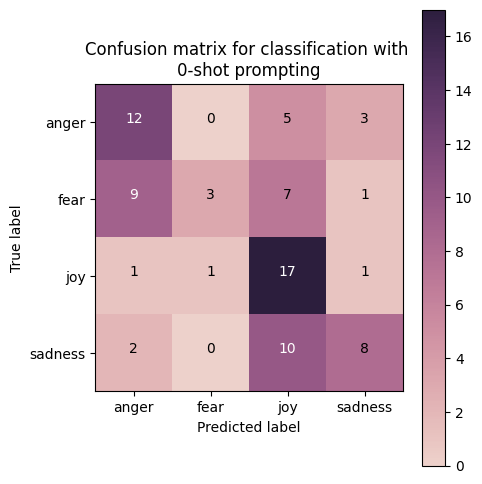

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear

Text: My future must be bright af.
Class: joy

Text: @LazyBoiSam blues... blues? 🤔
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:12<00:03,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.89 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.42it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:08,  1.69it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.92 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:11<00:03,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.24 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.52      0.60      0.56        20
        fear       0.71      0.25      0.37        20
         joy       0.56      0.75      0.64        20
     sadness       0.52      0.60      0.56        20

    accuracy                           0.55        80
   macro avg       0.58      0.55      0.53        80
weighted avg       0.58      0.55      0.53        80



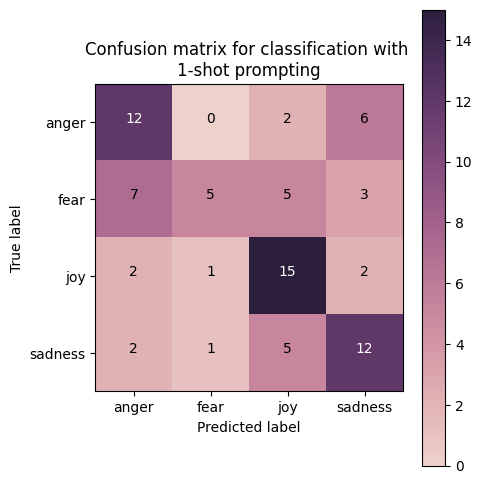

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: If you be #angry, which may be the case, &amp; which may be unavoidable, see that the sudden excitement does not become sin. #AlbertBarnes
Class: anger

Text: @cc_yandian @HillaryClinton her team must draw from a hat for daily personality #drugged  #yeller #quiet #screamer #😂😂
Class: anger

Text: I believe women are more fiery because once a month they go through struggle and struggle is what develops a strong character.
Class: anger

Text: I don't mean to offend anyone, but 93.7 literally blames everything on white people. In some cases it's true, but a lot of times, it's not
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear


Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.28it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.21 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.51 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.74 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.22 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.09it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.81 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.56      0.70      0.62        20
        fear       0.67      0.20      0.31        20
         joy       0.62      0.65      0.63        20
     sadness       0.50      0.70      0.58        20

    accuracy                           0.56        80
   macro avg       0.59      0.56      0.54        80
weighted avg       0.59      0.56      0.54        80



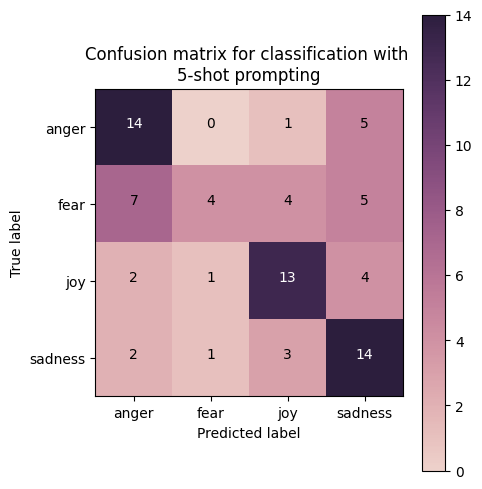

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

### Answer here
The accuracy increase with shot(s) included. Accuracy score: zero-shot < 1-shot < 5-shot => Better performance as the number of examples increases, but the level of performance increment from 1-shot to 5-shot is kind of plateau, it is not as high as from zero-shot to 1-shot.

Based on precision, recall, and F1-Score comparison in the classification report, it can be seen that most of the scores are lowest in zero-shot. In general, zero-shot is inconsistent, 1-shot stabilizes performance, and 5-shot produces the most reliable and balanced metrics.

The confusion matrix shown by heatmap is less noisy and more diagonal structure in 1-shot than in zero-shot. And the 5-shot heatmap show the clearest reduction in class confusion by the strongest diagonal structure => it shows the better classification performance

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [55]:
# Answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

folder = 'results/llm_classification_results/'
df_0_shot = pd.read_csv(folder + 'results_samples_20_shots_0.csv')
df_1_shot = pd.read_csv(folder + 'results_samples_20_shots_1.csv')
df_5_shot = pd.read_csv(folder + 'results_samples_20_shots_5.csv')
print (df_0_shot.head(2))

                                                text true_emotion  \
0  @CozanGaming that's what lisa asked before she...        anger   
1  @isthataspider @dhodgs i will fight this guy! ...        anger   

  predicted_emotion  
0               joy  
1             anger  


In [77]:
combined = pd.DataFrame({'text' : df_0_shot['text'] , 
                         'true': df_0_shot['true_emotion'],
                         'predict_0': df_0_shot['predicted_emotion'],
                         'predict_1': df_1_shot['predicted_emotion'],
                         'predict_5': df_5_shot['predicted_emotion']})
# Cases where text classification improves with more examples (pred emotion is right with examples): 
# improve from 0_shot to 5_shot, or 1_shot to 5_shot
improve = combined[(combined['predict_5'] == combined['true']) &
                            ((combined['predict_0'] != combined['true']) | (combined['predict_1'] != combined['true']))]
print("\n Improve with more examples: ", len(improve), " cases")
print(improve)

# Cases where it does not improve (pred emotion always wrong)
not_improve = combined[(combined['predict_0'] != combined['true']) & (combined['predict_1'] != combined['true']) & (combined['predict_5'] != combined['true'])]
print("\n Not improve with more examples: ", len(not_improve), " cases")
print(not_improve)

# Cases where the classification got worse with more examples (pred emotion goes from right to wrong with examples)
# if there is any downward from 0_shot to 1_shot, 0_shot to 5_shot or 1_shot to 5_shot
worse = combined[(combined['predict_5'] != combined['true']) &
                ((combined['predict_0'] == combined['true']) | (combined['predict_1'] == combined['true']))]
print("\n Worse with more examples: ", len(worse), " cases")
print(worse)


 Improve with more examples:  10  cases
                                                 text     true predict_0  \
0   @CozanGaming that's what lisa asked before she...    anger       joy   
5              @TrussElise Obama must be fuming.. lol    anger       joy   
8   @Jen_ny69 People will always get offended ever...    anger       joy   
26  Trying to book holiday flights on @britishairw...     fear     anger   
62  Folk Band 'Thistle Down' will be replaced by '...  sadness       joy   
64  @OHSOVICTORIOUS_ @FaZeAdapt We all seen it com...  sadness       joy   
67  @CovinoandRich just heard back2back,  guess th...  sadness       joy   
69  @LeePorter94 @DomMcGovern_ hi Dom I saw u at N...  sadness       joy   
71  Remembering those day when u still did'nt know...  sadness       joy   
73  you are on an endless journey of figuring your...  sadness       joy   

   predict_1 predict_5  
0    sadness     anger  
5      anger     anger  
8        joy     anger  
26      fear      fear

In [81]:
def count_emotions(df, label='true'):
    emotions = combined['true'].unique()
    return df[label].value_counts().reindex(emotions, fill_value=0)
emotion_summary = pd.DataFrame({"Improve": count_emotions(improve), "Not improve": count_emotions(not_improve), "Worse": count_emotions(worse)})
print(emotion_summary)

         Improve  Not improve  Worse
true                                
anger          3            5      1
fear           1           15      1
joy            0            3      4
sadness        6            6      0


#### Discussion about findings
There are cases in which the model initially predicted wrong under 0-shot or 1-shot conditions, but correctly predicted the emotion with 5-shot => few-shot probably enhances contextual understanding.

There are texts where the model predicted the emotion incorrectly in all settings. This may be because the text ambiguity, the label mismatch or the insufficient examples for a certain emotion (especially the fear emotion: 15 cases not improve)

The worsen cases with increased number of shots show the probability of adding more examples can occasionally degrade accuracy. This problem may be due to overfitting or imbalance of dataset

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---